In [4]:
%matplotlib inline
import scipy.stats as stats
from IPython.core.pylabtools import figsize
import numpy as np
import matplotlib.pyplot as plt

[115.85679142 152.26153716 178.87449059 162.93500815 107.02820697
 105.19141146 118.38288501 125.3769803  102.88054011 206.71326136] ...


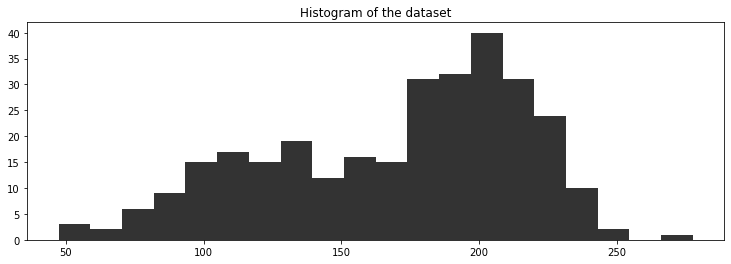

In [5]:
figsize(12.5, 4)
data = np.loadtxt("data/mixture_data.csv", delimiter=",")

plt.hist(data, bins=20, color="k", histtype="stepfilled", alpha=0.8)
plt.title("Histogram of the dataset")
plt.ylim([0, None]);
print(data[:10], "...")


In [18]:
import pymc3 as pm
import theano.tensor as T

with pm.Model() as model:
    k = pm.Binomial('k', n=10, p=.2)
    p_i = pm.Deterministic('p_i', 1/k)
    p = T.stack([p_i]*k)
    assignment = pm.Categorical("assignment", p, 
                                shape=data.shape[0],
                                testval=np.random.randint(0, 2, data.shape[0]))
    
print("prior assignment, with p_i = %.2f:" % p_i.tag.test_value)
print(assignment.tag.test_value[:10])

prior assignment, with p_i = 0.50:
[1 0 0 0 1 0 1 1 1 0]


In [7]:
[3]*3

[3, 3, 3]